In [2]:
import os
import ffmpeg
from pydub.utils import mediainfo

def convert_m4a_to_wav_ffmpeg(voice_path, output_path):
    try:
        # FFmpeg ile dönüştürme işlemi
        ffmpeg.input(voice_path).output(output_path).run()
        print(f"✓ Dönüştürme başarılı: {voice_path} -> {output_path}")
        return True
    except ffmpeg.Error as e:
        print(f"✗ Dönüşüm hatası: {e}")
        return False

def is_valid_audio_file(file_path):
    # Dosyanın geçerli bir ses dosyası olup olmadığını kontrol eder
    try:
        info = mediainfo(file_path)
        return 'audio' in info['codec_type']
    except Exception as e:
        print(f"✗ Geçersiz dosya: {file_path}. Hata: {str(e)}")
        return False

def convert_m4a_to_wav(root_path):
    successful_conversions = []
    failed_conversions = []

    # Klasörlerdeki her dosyayı işleyelim
    for person in os.listdir(root_path):
        person_path = os.path.join(root_path, person)

        if os.path.isdir(person_path):  # Sadece kişi klasörleri
            print(f"İşleniyor: {person}")

            for sub_folder in os.listdir(person_path):
                sub_folder_path = os.path.join(person_path, sub_folder)

                if os.path.isdir(sub_folder_path):  # Alt klasörler (örneğin korku)
                    print(f"İşleniyor: {sub_folder} alt klasörü")

                    for voice_file in os.listdir(sub_folder_path):
                        voice_path = os.path.join(sub_folder_path, voice_file)
                        new_voice = os.path.join(sub_folder_path, f"{os.path.splitext(voice_file)[0]}.wav")

                        # Eğer dosya .m4a uzantılı ise
                        if voice_file.endswith(".m4a"):
                            # .wav dosyası zaten varsa, dönüşüm yapılmasın
                            if os.path.exists(new_voice):
                                print(f"✓ {voice_file} zaten dönüştürülmüş. Atlanıyor.")
                                successful_conversions.append(f"{person}/{sub_folder}/{voice_file}")
                            else:
                                print(f"İşleniyor: {voice_file}")
                                # FFmpeg ile dönüştürme
                                if convert_m4a_to_wav_ffmpeg(voice_path, new_voice):
                                    # Dönüşüm sonrası dosyanın geçerliliğini kontrol et
                                    if is_valid_audio_file(new_voice):
                                        successful_conversions.append(f"{person}/{sub_folder}/{voice_file}")
                                    else:
                                        print(f"✗ {new_voice} geçersiz ses dosyası. Siliniyor...")
                                        os.remove(new_voice)
                                        failed_conversions.append(f"{person}/{sub_folder}/{voice_file}")
                                else:
                                    failed_conversions.append(f"{person}/{sub_folder}/{voice_file}")
    
    # Başarı ve hata bilgilerini yazdırma
    print("\nBaşarılı Dönüşümler:")
    for success in successful_conversions:
        print(f"✓ {success}")

    print("\nBaşarısız Dönüşümler:")
    for fail in failed_conversions:
        print(f"✗ {fail}")

# Ses dosyalarının bulunduğu ana dizini belirleyin
root_path = r'..\Voice'  # Ses dosyalarınızın bulunduğu ana klasörü burada belirtin

print("Dönüşüm Başlıyor...")
convert_m4a_to_wav(root_path)


Dönüşüm Başlıyor...
İşleniyor: elif
İşleniyor: korku alt klasörü
✓ elifkorku1.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifkorku2.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifkorku3.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifkorku4.m4a zaten dönüştürülmüş. Atlanıyor.
İşleniyor: mutlu alt klasörü
✓ elifmutlu1.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifmutlu2.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifmutlu3.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifmutlu4.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifmutlu5.m4a zaten dönüştürülmüş. Atlanıyor.
İşleniyor: notr alt klasörü
✓ elifnötr1.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifnötr2.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifnötr3.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifnötr4.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifnötr5.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifnötr6.m4a zaten dönüştürülmüş. Atlanıyor.
İşleniyor: saskin alt klasörü
✓ elifşaşkınlık1.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifşaşkınlık2.m4a zaten dönüştürülmüş. Atlanıyor.
✓ elifşaşkınl

In [3]:
import os
from pydub import AudioSegment
import numpy as np

def change_speed(sound, speed=1.0):
    """Ses hızını değiştirme"""
    sound = sound._spawn(sound.raw_data)
    sound = sound.set_frame_rate(int(sound.frame_rate * speed))
    return sound

def change_pitch_with_pydub(sound, pitch_factor=1.0):
    """Pydub kullanarak pitch değiştirme"""
    new_sample_rate = int(sound.frame_rate * (2 ** pitch_factor))
    sound = sound._spawn(sound.raw_data, overrides={'frame_rate': new_sample_rate})
    return sound

def add_noise(sound, noise_level=0.005):
    """Ses dosyasına gürültü ekleme"""
    samples = np.array(sound.get_array_of_samples())
    noise = np.random.normal(0, noise_level, len(samples))
    noisy_samples = samples + noise
    noisy_samples = np.clip(noisy_samples, -32768, 32767)  # 16-bit PCM
    sound = AudioSegment(
        noisy_samples.astype(np.int16).tobytes(),
        frame_rate=sound.frame_rate,
        sample_width=2,
        channels=sound.channels,
    )
    return sound

def save_augmented_sound(sound, output_path):
    """Çoğaltılmış ses dosyasını kaydetme"""
    sound.export(output_path, format="wav")

def augment_audio(input_file, output_dir, person, sub_folder):
    """Ses dosyasını çoğaltma ve etiketleme"""
    sound = AudioSegment.from_wav(input_file)
    
    # Veri artırma işlemleri
    augmented_sounds = []
    
    # Hız değişikliği
    augmented_sounds.append(change_speed(sound, speed=1.2))
    augmented_sounds.append(change_speed(sound, speed=0.8))
    
    # Pitch değişikliği
    augmented_sounds.append(change_pitch_with_pydub(sound, pitch_factor=0.2))
    augmented_sounds.append(change_pitch_with_pydub(sound, pitch_factor=-0.2))
    
    # Gürültü ekleme
    augmented_sounds.append(add_noise(sound, noise_level=0.01))
    
    # Yeni dosyaları kaydetme
    person_folder = os.path.join(output_dir, person)  # Kişiye ait klasör
    os.makedirs(person_folder, exist_ok=True)
    
    sub_folder_path = os.path.join(person_folder, sub_folder)  # Alt klasör oluşturma (örn. korku, mutlu)
    os.makedirs(sub_folder_path, exist_ok=True)
    
    base_name = os.path.splitext(os.path.basename(input_file))[0]
    
    for i, augmented_sound in enumerate(augmented_sounds):
        output_path = os.path.join(sub_folder_path, f"{base_name}_augmented_{i+1}.wav")
        
        # Eğer dosya zaten varsa, yeni dosya eklemeyin
        if not os.path.exists(output_path):
            save_augmented_sound(augmented_sound, output_path)
            print(f"Saved augmented sound to: {output_path}")  # Çıktı mesajı
        else:
            print(f"File {output_path} already exists, skipping...")  # Dosya mevcutsa, mesaj yazdır

def process_all_folders(directory):
    """Klasör yapısındaki her dosyayı dolaşarak ses çoğaltma işlemi yapma"""
    output_dir = "augmented_sounds"  # Çoğaltılmış ses dosyalarının kaydedileceği ana klasör
    for person in os.listdir(directory):
        person_path = os.path.join(directory, person)
        if os.path.isdir(person_path):  # Kişi klasörlerini kontrol et
            # Alt klasörleri (örneğin korku, mutlu) işleyelim
            for sub_folder in os.listdir(person_path):
                sub_folder_path = os.path.join(person_path, sub_folder)
                if os.path.isdir(sub_folder_path):  # Alt klasörleri kontrol et
                    for file in os.listdir(sub_folder_path):
                        if file.endswith('.wav'):
                            file_path = os.path.join(sub_folder_path, file)
                            
                            # Ses dosyasını çoğaltma
                            print(f"Processing {file_path}...")
                            augment_audio(file_path, output_dir, person, sub_folder)  # Ses dosyasını çoğaltma

# Örnek kullanım
directory = "..\Voice"  # Ses dosyalarınızın bulunduğu ana klasör (örn. "irem", "elif", "nazli" klasörleri içinde)
process_all_folders(directory)


Processing ..\Voice\elif\korku\elifkorku1.wav...
File augmented_sounds\elif\korku\elifkorku1_augmented_1.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku1_augmented_2.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku1_augmented_3.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku1_augmented_4.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku1_augmented_5.wav already exists, skipping...
Processing ..\Voice\elif\korku\elifkorku2.wav...
File augmented_sounds\elif\korku\elifkorku2_augmented_1.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku2_augmented_2.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku2_augmented_3.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku2_augmented_4.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku2_augmented_5.wav already exists, skipping...
Processing ..\Voice\el

In [4]:
import os
from pydub import AudioSegment
import numpy as np

def change_speed(sound, speed=1.0):
    """Ses hızını değiştirme"""
    sound = sound._spawn(sound.raw_data)
    sound = sound.set_frame_rate(int(sound.frame_rate * speed))
    return sound

def change_pitch_with_pydub(sound, pitch_factor=1.0):
    """Pydub kullanarak pitch değiştirme"""
    new_sample_rate = int(sound.frame_rate * (2 ** pitch_factor))
    sound = sound._spawn(sound.raw_data, overrides={'frame_rate': new_sample_rate})
    return sound

def add_noise(sound, noise_level=0.005):
    """Ses dosyasına gürültü ekleme"""
    samples = np.array(sound.get_array_of_samples())
    noise = np.random.normal(0, noise_level, len(samples))
    noisy_samples = samples + noise
    noisy_samples = np.clip(noisy_samples, -32768, 32767)  # 16-bit PCM
    sound = AudioSegment(
        noisy_samples.astype(np.int16).tobytes(),
        frame_rate=sound.frame_rate,
        sample_width=2,
        channels=sound.channels,
    )
    return sound

def save_augmented_sound(sound, output_path):
    """Çoğaltılmış ses dosyasını kaydetme"""
    sound.export(output_path, format="wav")

def augment_audio(input_file, output_dir, person, sub_folder):
    """Ses dosyasını çoğaltma ve etiketleme"""
    sound = AudioSegment.from_wav(input_file)
    
    # Veri artırma işlemleri
    augmented_sounds = []
    
    # Hız değişikliği
    augmented_sounds.append(change_speed(sound, speed=1.2))
    augmented_sounds.append(change_speed(sound, speed=0.8))
    
    # Pitch değişikliği
    augmented_sounds.append(change_pitch_with_pydub(sound, pitch_factor=0.2))
    augmented_sounds.append(change_pitch_with_pydub(sound, pitch_factor=-0.2))
    
    # Gürültü ekleme
    augmented_sounds.append(add_noise(sound, noise_level=0.01))
    
    # Yeni dosyaları kaydetme
    person_folder = os.path.join(output_dir, person)  # Kişiye ait klasör
    os.makedirs(person_folder, exist_ok=True)
    
    sub_folder_path = os.path.join(person_folder, sub_folder)  # Alt klasör oluşturma (örn. korku, mutlu)
    os.makedirs(sub_folder_path, exist_ok=True)
    
    base_name = os.path.splitext(os.path.basename(input_file))[0]
    
    for i, augmented_sound in enumerate(augmented_sounds):
        output_path = os.path.join(sub_folder_path, f"{base_name}_augmented_{i+1}.wav")
        
        # Eğer dosya zaten varsa, yeni dosya eklemeyin
        if not os.path.exists(output_path):
            save_augmented_sound(augmented_sound, output_path)
            print(f"Saved augmented sound to: {output_path}")  # Çıktı mesajı
        else:
            print(f"File {output_path} already exists, skipping...")  # Dosya mevcutsa, mesaj yazdır

def process_all_folders(directory):
    """Klasör yapısındaki her dosyayı dolaşarak ses çoğaltma işlemi yapma"""
    output_dir = "augmented_sounds"  # Çoğaltılmış ses dosyalarının kaydedileceği ana klasör
    for person in os.listdir(directory):
        person_path = os.path.join(directory, person)
        if os.path.isdir(person_path):  # Kişi klasörlerini kontrol et
            # Alt klasörleri (örneğin korku, mutlu) işleyelim
            for sub_folder in os.listdir(person_path):
                sub_folder_path = os.path.join(person_path, sub_folder)
                if os.path.isdir(sub_folder_path):  # Alt klasörleri kontrol et
                    for file in os.listdir(sub_folder_path):
                        if file.endswith('.wav'):
                            file_path = os.path.join(sub_folder_path, file)
                            
                            # Ses dosyasını çoğaltma
                            print(f"Processing {file_path}...")
                            augment_audio(file_path, output_dir, person, sub_folder)  # Ses dosyasını çoğaltma

# Örnek kullanım
directory = "..\Voice"  # Ses dosyalarınızın bulunduğu ana klasör (örn. "irem", "elif", "nazli" klasörleri içinde)
process_all_folders(directory)


Processing ..\Voice\elif\korku\elifkorku1.wav...
File augmented_sounds\elif\korku\elifkorku1_augmented_1.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku1_augmented_2.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku1_augmented_3.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku1_augmented_4.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku1_augmented_5.wav already exists, skipping...
Processing ..\Voice\elif\korku\elifkorku2.wav...
File augmented_sounds\elif\korku\elifkorku2_augmented_1.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku2_augmented_2.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku2_augmented_3.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku2_augmented_4.wav already exists, skipping...
File augmented_sounds\elif\korku\elifkorku2_augmented_5.wav already exists, skipping...
Processing ..\Voice\el

In [5]:
import librosa
import numpy as np
import os
import pandas as pd

def extract_features(file_path):
    try:
        # Ses dosyasını yükleyin
        y, sr = librosa.load(file_path, sr=None)
        
        # MFCC (Mel-frequency cepstral coefficients) çıkarımı
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc, axis=1)  # MFCC ortalamasını al

        # Chroma çıkarımı (sesin müzikal tonları hakkında bilgi verir)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_mean = np.mean(chroma, axis=1)

        # RMS Energy çıkarımı
        rms = librosa.feature.rms(y=y)
        rms_mean = np.mean(rms)

        # Zero-Crossing Rate çıkarımı
        zcr = librosa.feature.zero_crossing_rate(y=y)
        zcr_mean = np.mean(zcr)
        
        # Özellikleri birleştir
        features = np.hstack((mfcc_mean, chroma_mean, rms_mean, zcr_mean))
        return features
    
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

def process_audio_files(directory):
    features_list = []
    labels = []
    
    for person in os.listdir(directory):
        person_path = os.path.join(directory, person)
        if os.path.isdir(person_path):
            for sub_folder in os.listdir(person_path):
                sub_folder_path = os.path.join(person_path, sub_folder)
                if os.path.isdir(sub_folder_path):
                    for file in os.listdir(sub_folder_path):
                        if file.endswith('.wav'):
                            file_path = os.path.join(sub_folder_path, file)
                            
                            print(f"Processing file: {file_path}")
                            features = extract_features(file_path)
                            
                            if features is not None:
                                features_list.append(features)
                                labels.append(person)
                            else:
                                print(f"Skipping {file_path} due to error in feature extraction.")
    
    if features_list:
        # Özellikleri ve etiketleri bir DataFrame'e dönüştürme
        features_df = pd.DataFrame(features_list)
        features_df['label'] = labels
        return features_df
    else:
        print("No features extracted.")
        return pd.DataFrame()

# Örnek kullanım
directory = "augmented_sounds"  # Ses dosyalarınızın bulunduğu ana klasör
features_df = process_audio_files(directory)

# Özellikleri bir CSV dosyasına kaydedelim
try:
    if not features_df.empty:
        features_df.to_csv('audio_features.csv', index=False)
        print("Features extracted and saved to 'audio_features.csv'.")
    else:
        print("No features to save.")
except Exception as e:
    print(f"Error saving to CSV: {e}")

# Özelliklerin doğruluğunu kontrol et
print(features_df.head())  # İlk birkaç satırı görüntüleyin
print(features_df.info())  # Veri tipleri ve eksik değerler hakkında bilgi


Processing file: augmented_sounds\elif\korku\elifkorku1_augmented_1.wav
Processing file: augmented_sounds\elif\korku\elifkorku1_augmented_2.wav
Processing file: augmented_sounds\elif\korku\elifkorku1_augmented_3.wav
Processing file: augmented_sounds\elif\korku\elifkorku1_augmented_4.wav
Processing file: augmented_sounds\elif\korku\elifkorku1_augmented_5.wav
Processing file: augmented_sounds\elif\korku\elifkorku2_augmented_1.wav
Processing file: augmented_sounds\elif\korku\elifkorku2_augmented_2.wav
Processing file: augmented_sounds\elif\korku\elifkorku2_augmented_3.wav
Processing file: augmented_sounds\elif\korku\elifkorku2_augmented_4.wav
Processing file: augmented_sounds\elif\korku\elifkorku2_augmented_5.wav
Processing file: augmented_sounds\elif\korku\elifkorku3_augmented_1.wav
Processing file: augmented_sounds\elif\korku\elifkorku3_augmented_2.wav
Processing file: augmented_sounds\elif\korku\elifkorku3_augmented_3.wav
Processing file: augmented_sounds\elif\korku\elifkorku3_augmente

c:\Users\iremm\.conda\envs\BTK-AI\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Ses Dosyaları İçin WAVEFORM VE SPECTROGRAM HİSTOGRAMI İŞLEMİ BAŞLIYOR...
İşleniyor: elif
İşleniyor: korku alt klasörü


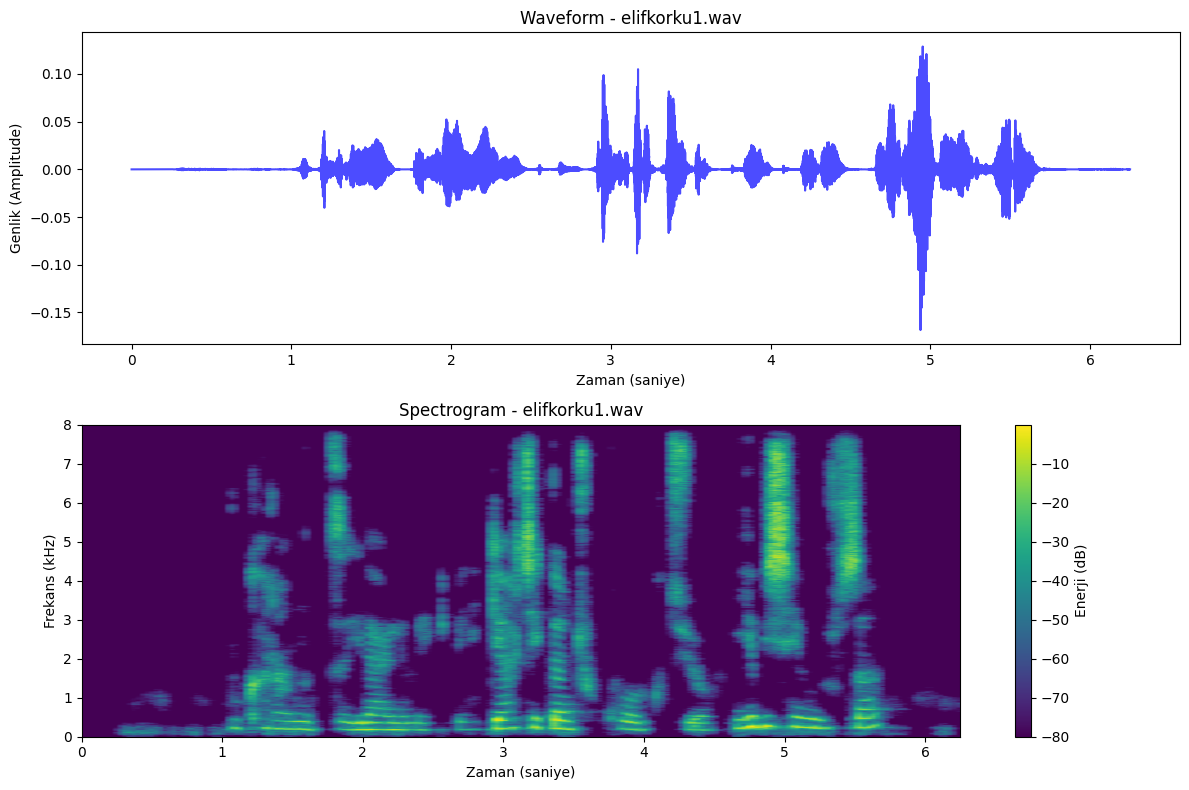

İşleniyor: mutlu alt klasörü


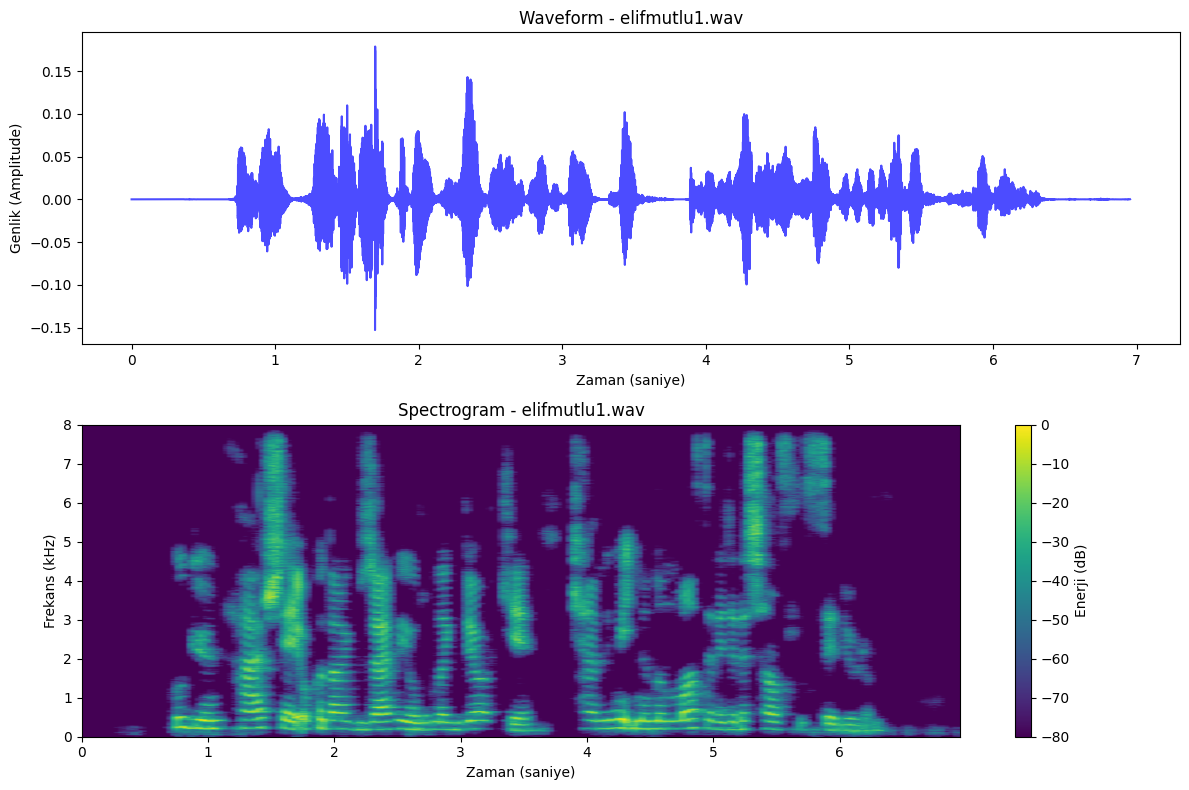

İşleniyor: notr alt klasörü


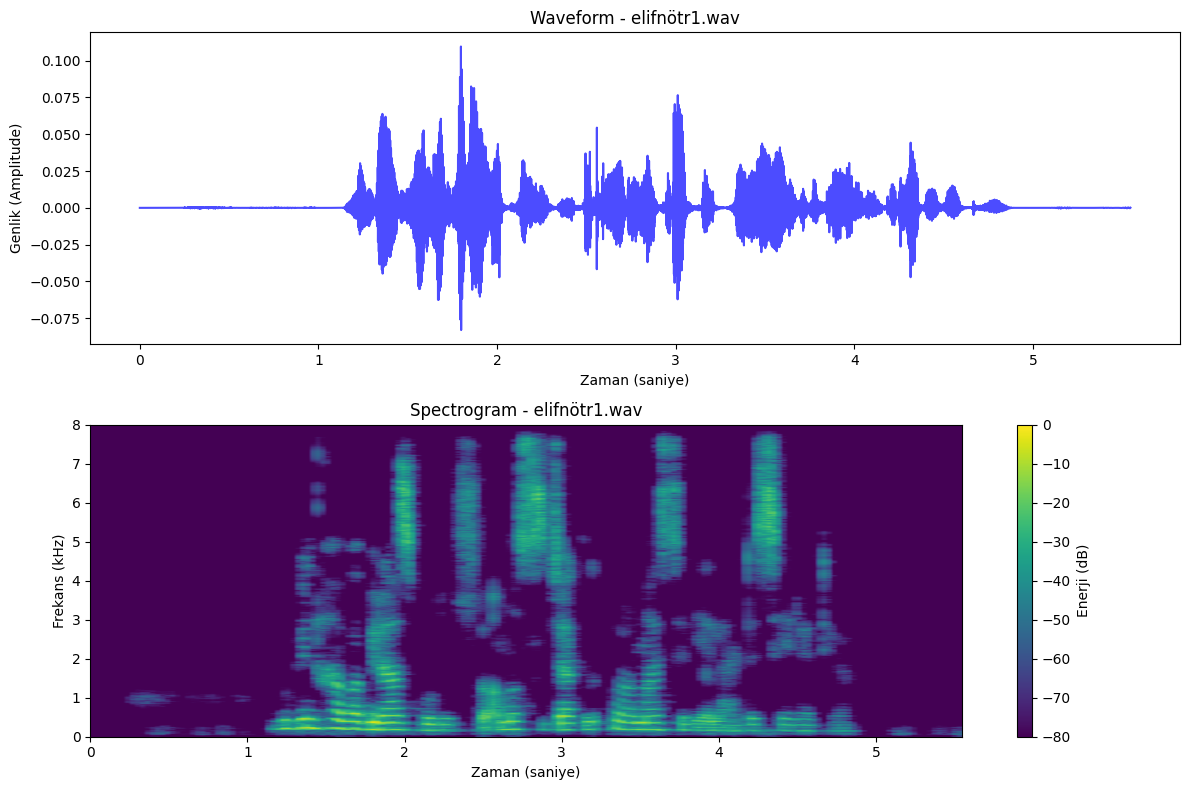

İşleniyor: saskin alt klasörü


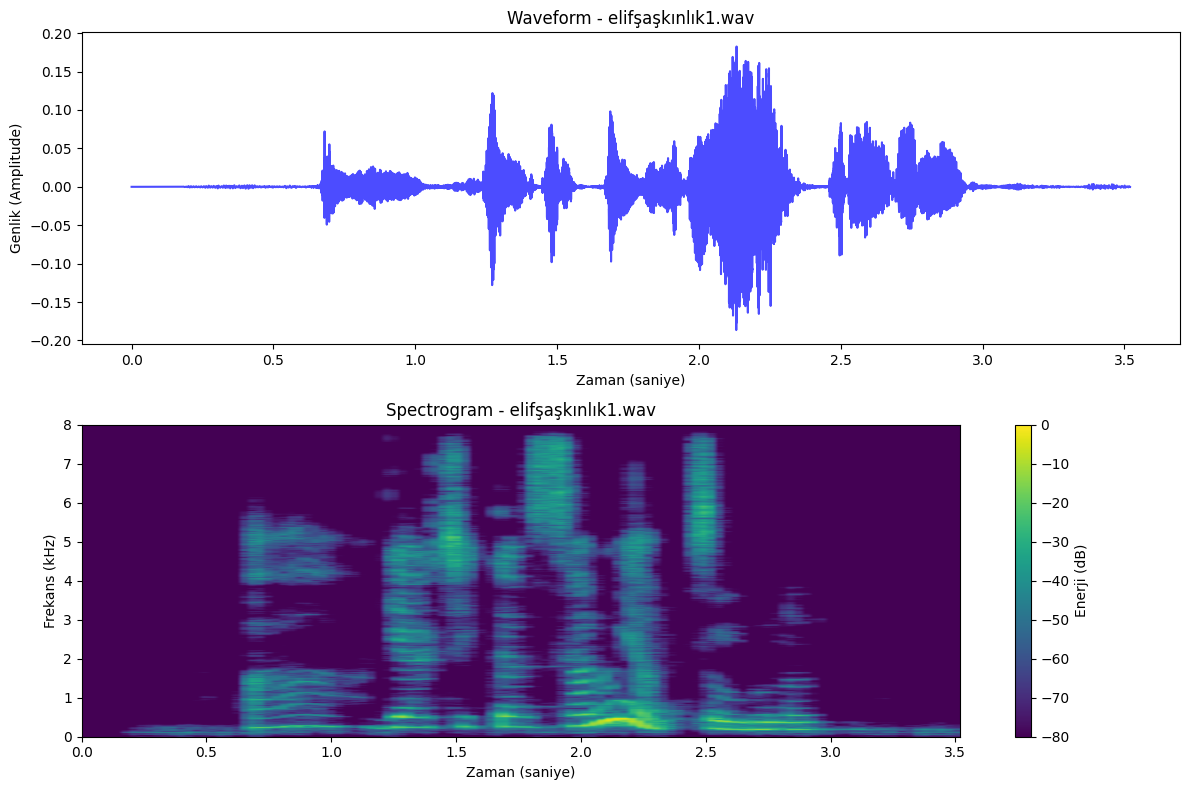

İşleniyor: sinirli alt klasörü


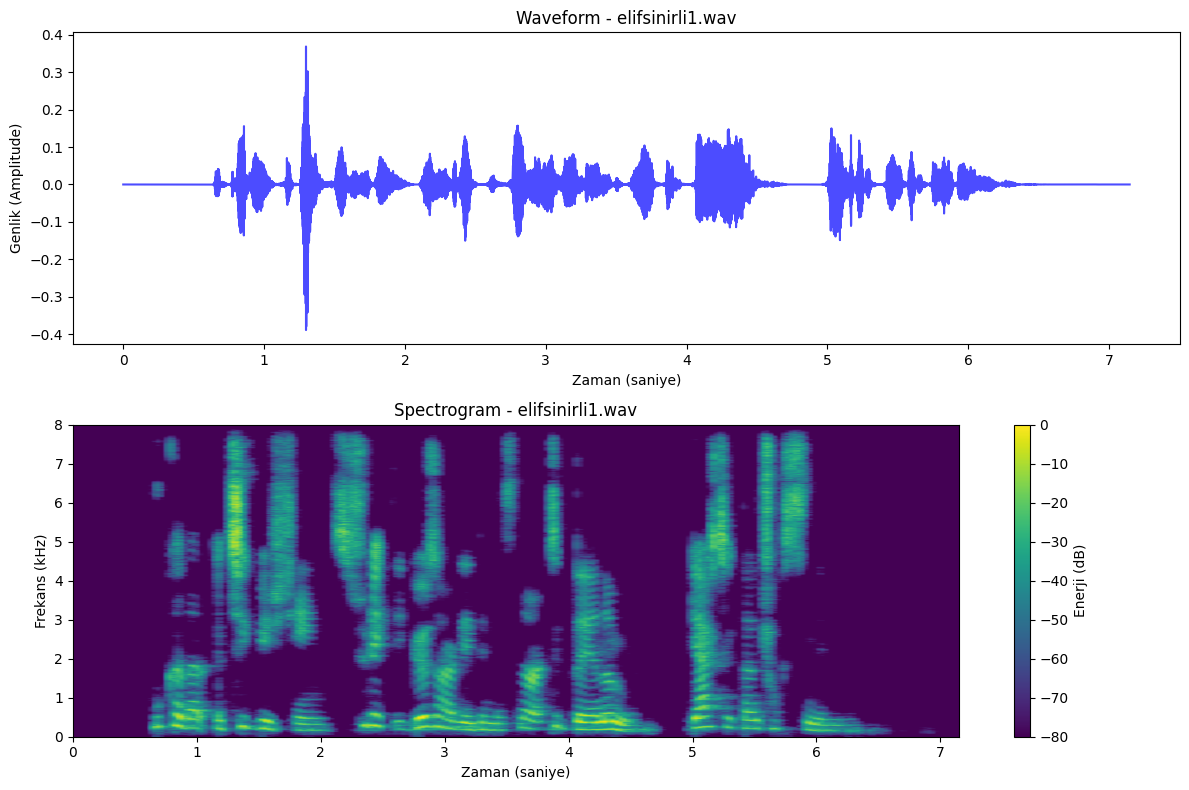

İşleniyor: uzgun alt klasörü


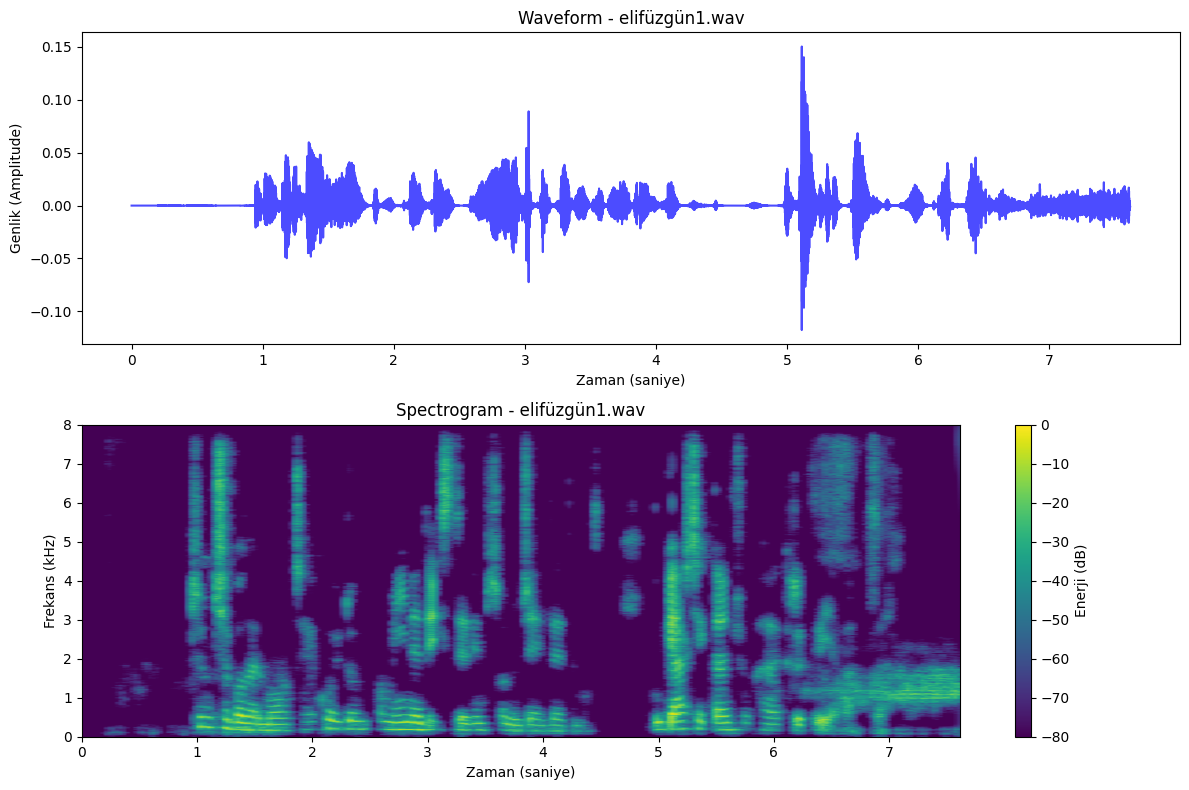

İşleniyor: irem
İşleniyor: korku alt klasörü


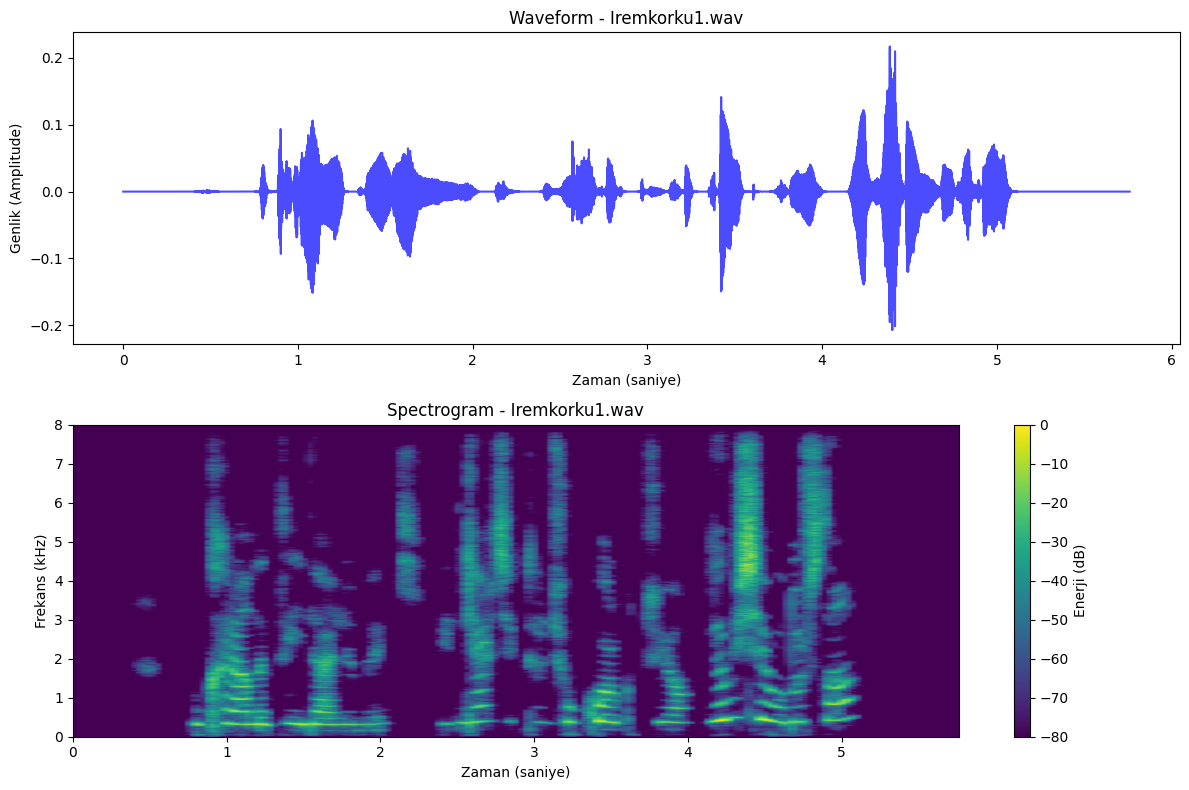

İşleniyor: mutlu alt klasörü


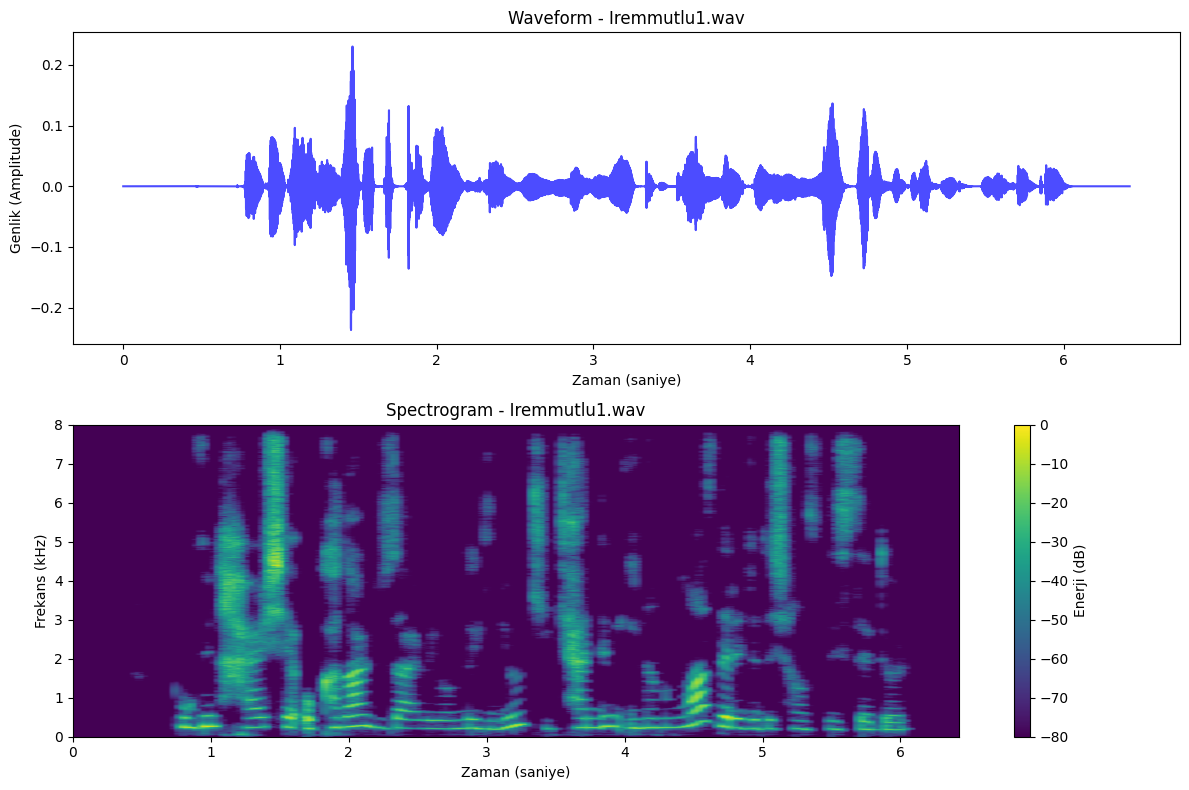

İşleniyor: notr alt klasörü


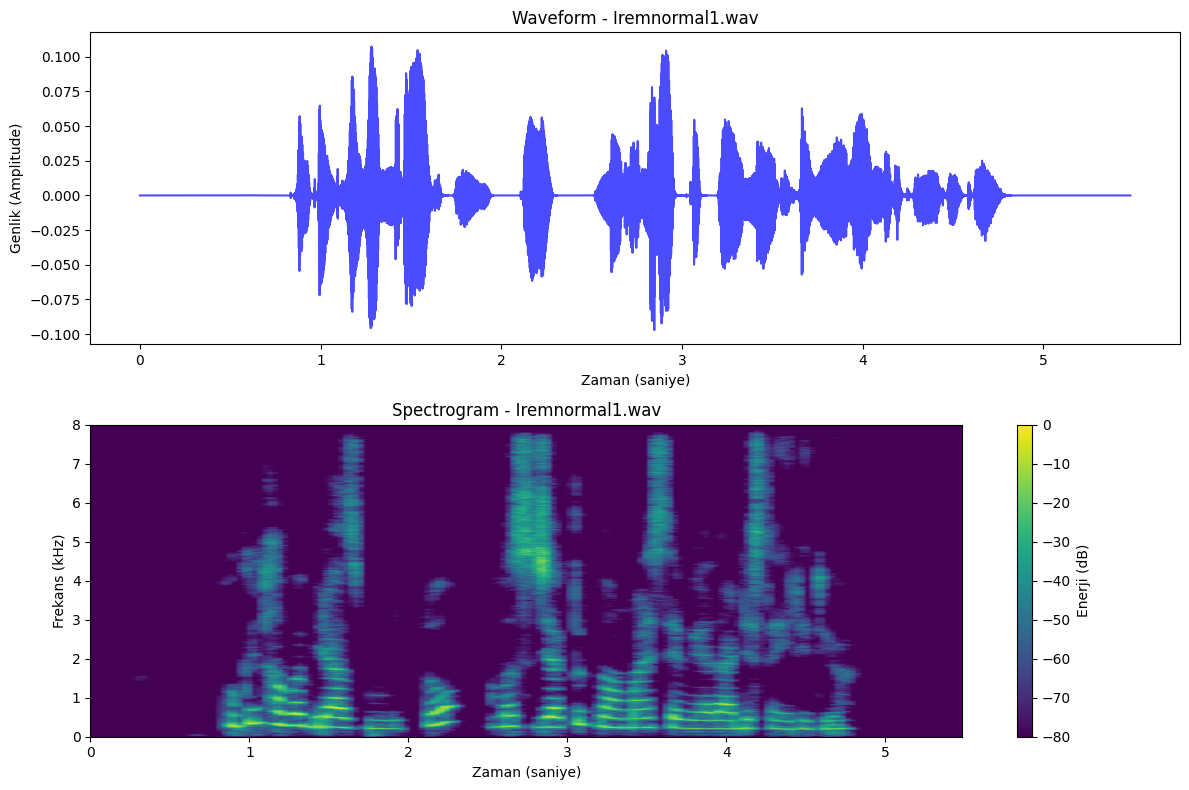

İşleniyor: saskin alt klasörü


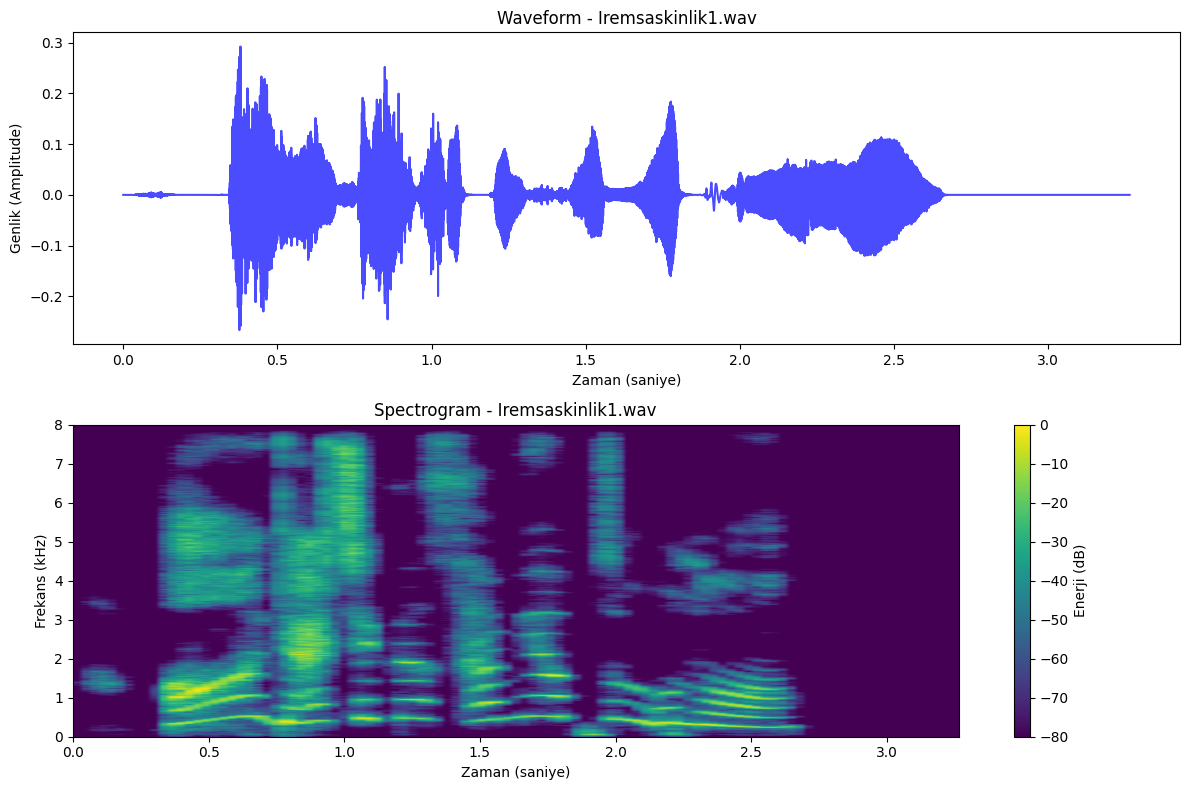

İşleniyor: sinirli alt klasörü


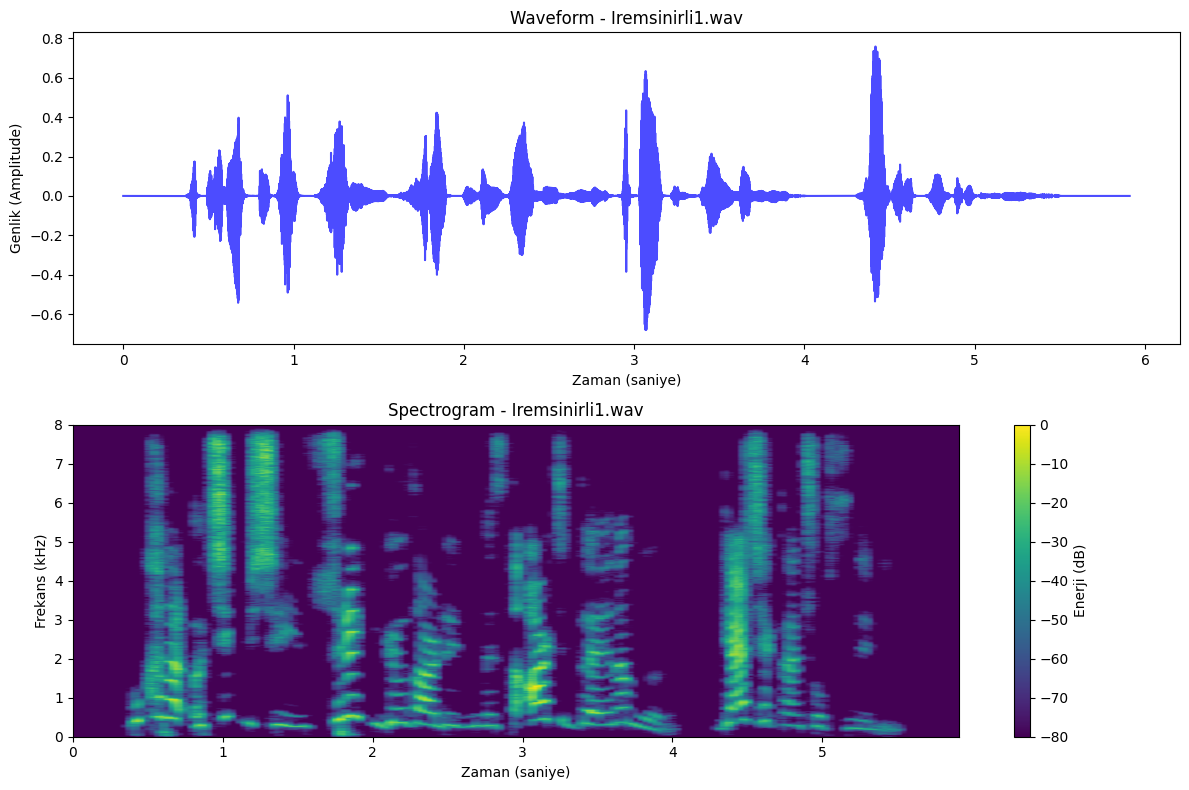

İşleniyor: uzgun alt klasörü


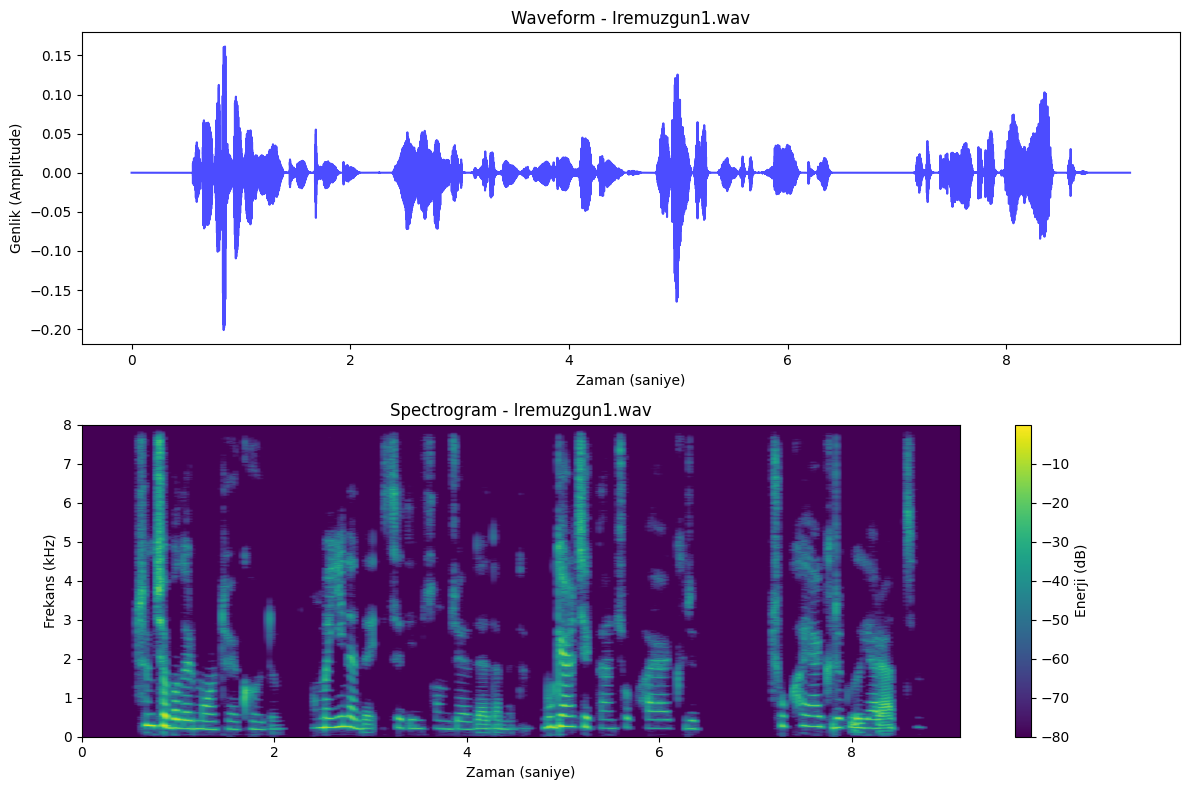

İşleniyor: nazli
İşleniyor: korku alt klasörü


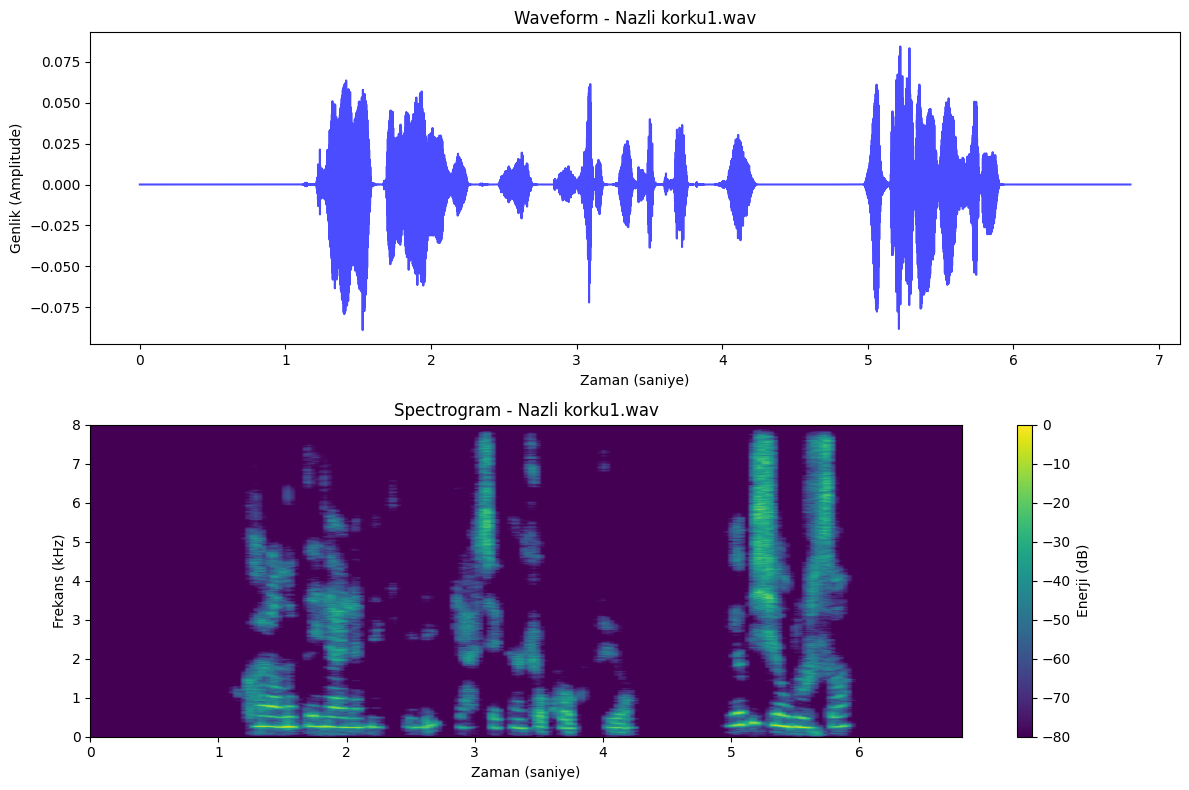

İşleniyor: mutlu alt klasörü


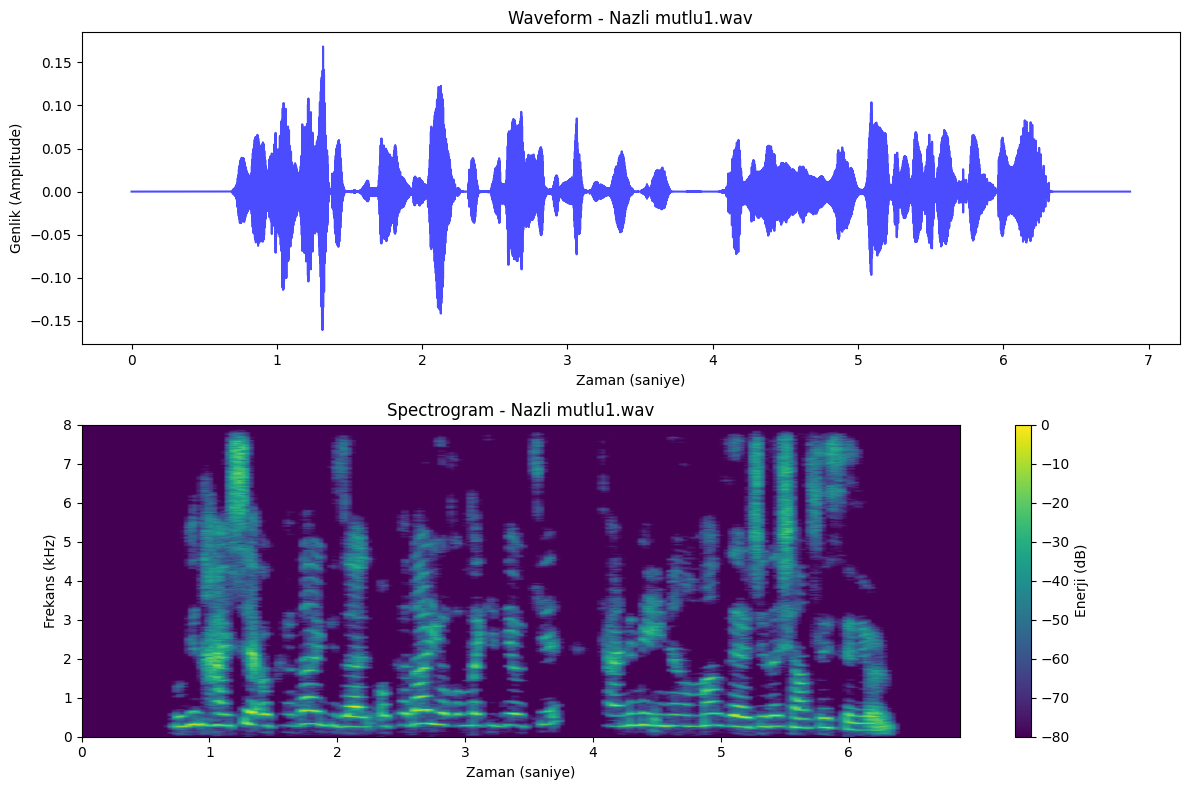

İşleniyor: notr alt klasörü


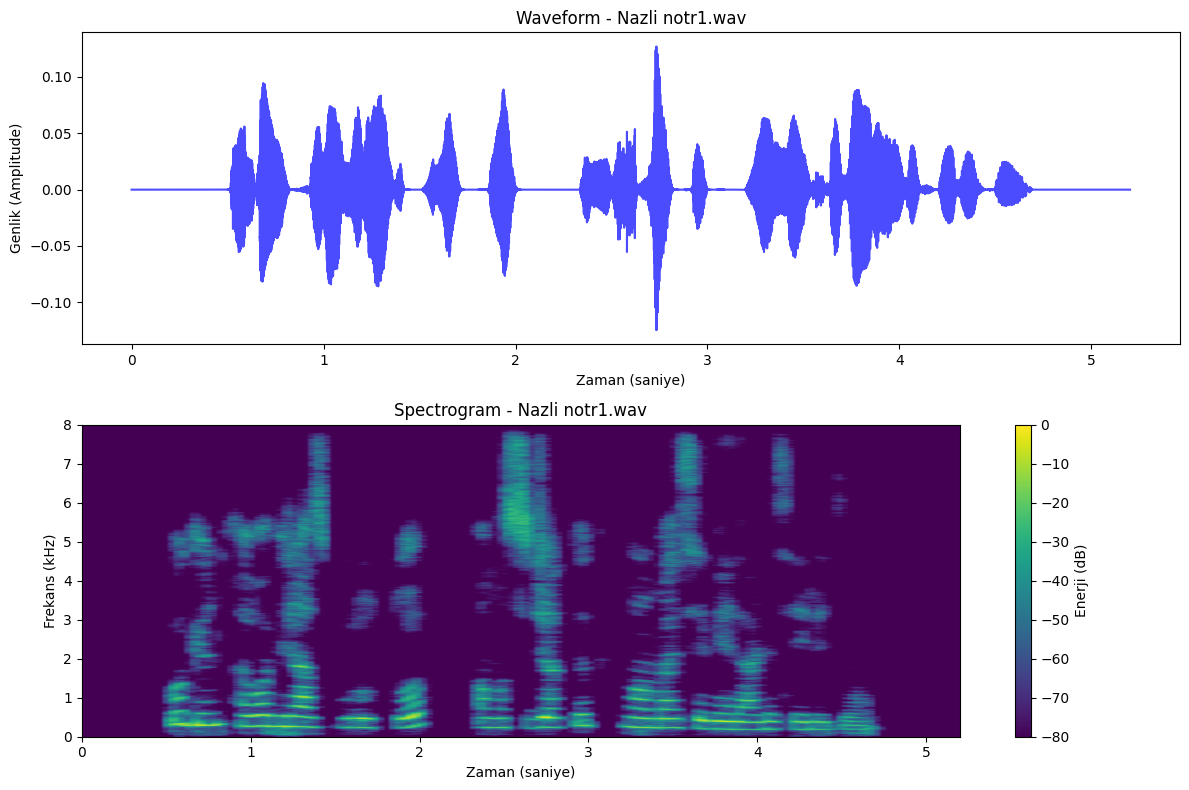

İşleniyor: saskin alt klasörü


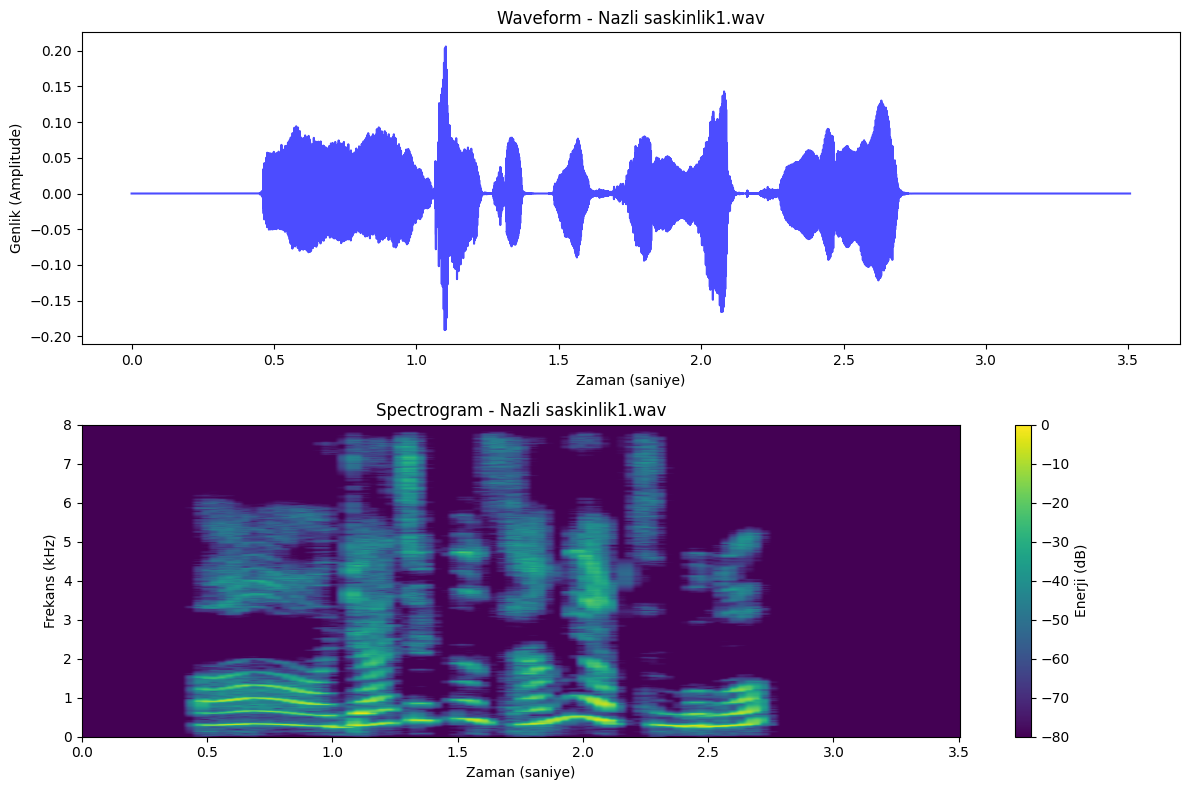

İşleniyor: sinirli alt klasörü


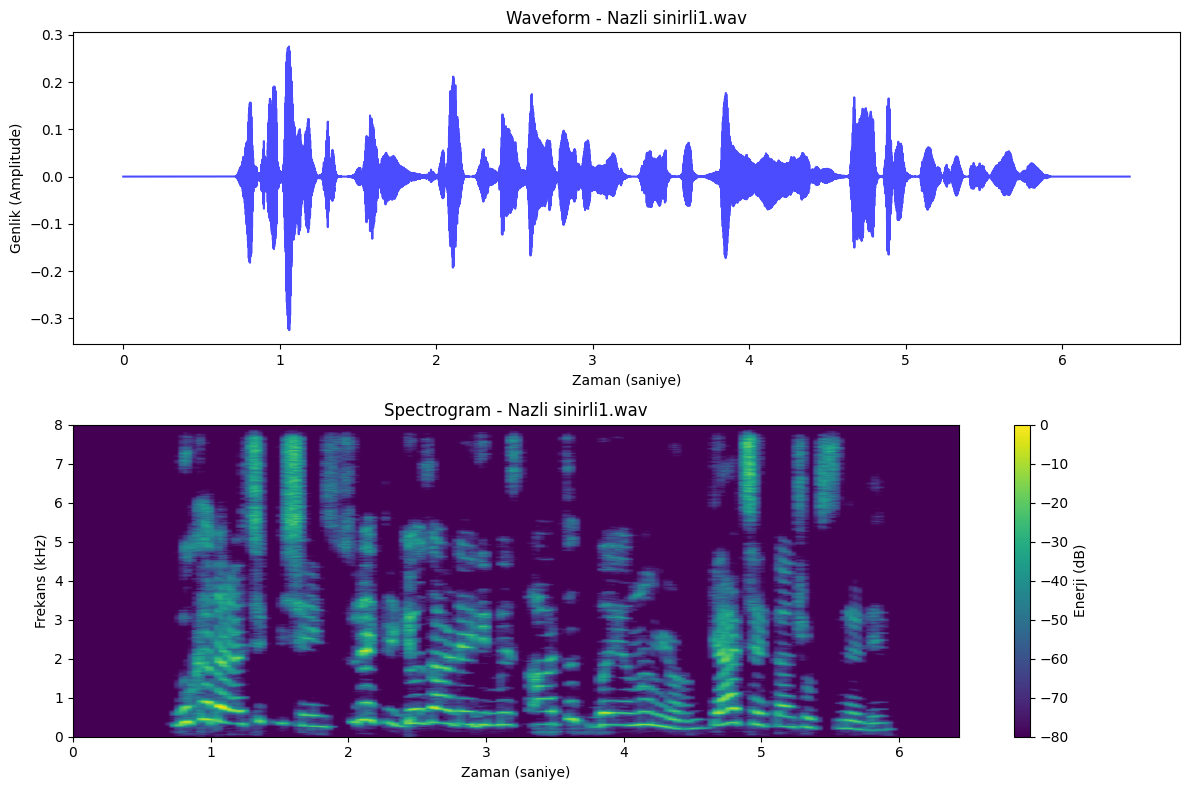

İşleniyor: uzgun alt klasörü


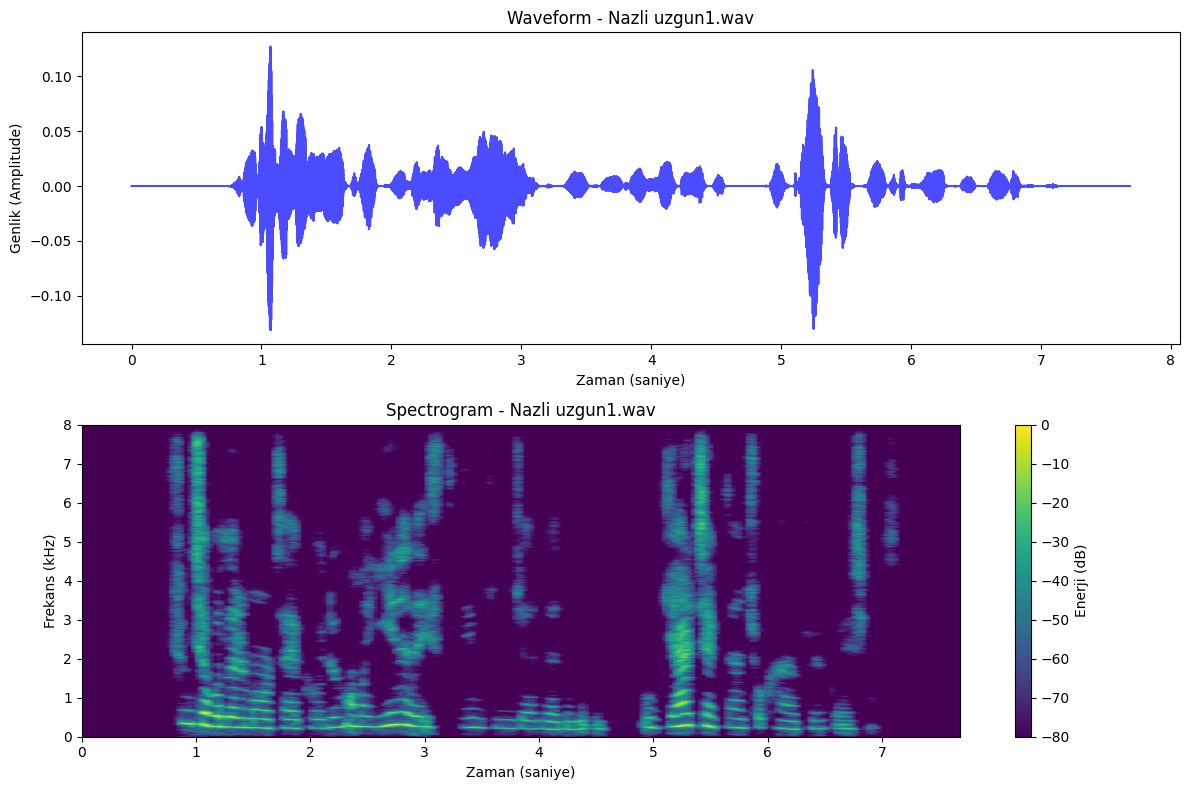

In [6]:
import librosa
import matplotlib.pyplot as plt
import os
import noisereduce as nr
import numpy as np

# Waveform ve Spectrogram histogramlarını çizmek için fonksiyon
def plot_waveform_and_spectrogram_histogram(file_path):
    # Ses dosyasını yükle
    y, sr = librosa.load(file_path, sr=16000)
    
    # Gürültü azaltma (isteğe bağlı)
    y = nr.reduce_noise(y=y, sr=sr)
    
    # Waveform (dalga formu) histogramı
    plt.figure(figsize=(12, 8))

    # Waveform Histogramı: Amplitude ve Zaman
    plt.subplot(2, 1, 1)
    plt.plot(np.linspace(0, len(y) / sr, num=len(y)), y, color='blue', alpha=0.7)
    plt.title(f'Waveform - {os.path.basename(file_path)}')
    plt.xlabel('Zaman (saniye)')
    plt.ylabel('Genlik (Amplitude)')

    # Spectrogram (frekans spektrumu) histogramı
    D = librosa.stft(y)  # Short-Time Fourier Transform
    S_db, phase = librosa.magphase(D)  # Sadece genlik
    S_db = librosa.amplitude_to_db(S_db, ref=np.max)  # Logaritmik dönüşüm (dB)

    # Spectrogram Enerji Histogramı: kHz ve Zaman
    plt.subplot(2, 1, 2)
    plt.imshow(S_db, aspect='auto', cmap='viridis', origin='lower', 
               extent=[0, len(y) / sr, 0, sr / 2000])  # X: Zaman, Y: Frekans (kHz)
    plt.title(f'Spectrogram - {os.path.basename(file_path)}')
    plt.xlabel('Zaman (saniye)')
    plt.ylabel('Frekans (kHz)')
    plt.colorbar(label='Enerji (dB)')

    plt.tight_layout()
    plt.show()

# Ana dizindeki tüm kişiler için ses dosyalarını işle ve histogramları çiz
def process_and_plot_waveform_spectrogram_histograms(root_path):
    # Root dizindeki her kişi için işlem yap
    for person in os.listdir(root_path):
        person_path = os.path.join(root_path, person)
        if os.path.isdir(person_path):  # Kişi klasörüne girdiğimizden emin olalım
            print(f"İşleniyor: {person}")
            
            # Her alt klasördeki ses dosyasını bulalım (Örneğin "korku" alt klasöründeki dosyalar)
            for sub_folder in os.listdir(person_path):
                sub_folder_path = os.path.join(person_path, sub_folder)
                if os.path.isdir(sub_folder_path):  # Alt klasördeki ses dosyaları
                    print(f"İşleniyor: {sub_folder} alt klasörü")
                    
                    voice_files = [f for f in os.listdir(sub_folder_path) if f.endswith(".wav")]
                    if voice_files:
                        first_voice_file = voice_files[0]  # İlk .wav dosyasını al
                        voice_path = os.path.join(sub_folder_path, first_voice_file)
                        plot_waveform_and_spectrogram_histogram(voice_path)

# Ses dosyalarının bulunduğu ana dizin
root_path = r"..\\Voice"  

# Klasördeki her kişinin alt klasöründe (örneğin "korku" gibi) ilk ses dosyasını işleyip histogramları çiz
print("Ses Dosyaları İçin WAVEFORM VE SPECTROGRAM HİSTOGRAMI İŞLEMİ BAŞLIYOR...")
process_and_plot_waveform_spectrogram_histograms(root_path)
